In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# What is Time Series?
It is a series of data points listed in time order. For example: 
- Temperature during the day
- Number of taxi rides during a week

In [8]:
df = pd.read_csv('air_passengers.csv')

In [9]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


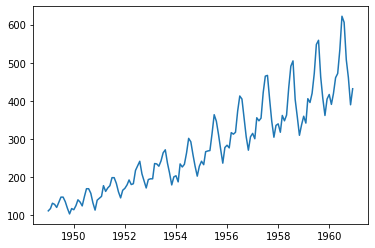

In [12]:
_= plt.plot(df['Month'], df['#Passengers'])

In [13]:
df = df.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
import statsmodels.api as sm

In [17]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

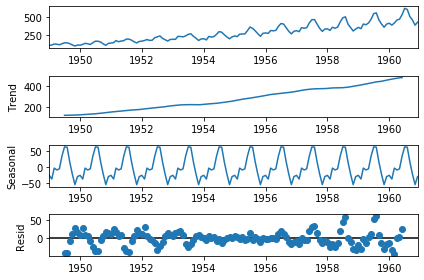

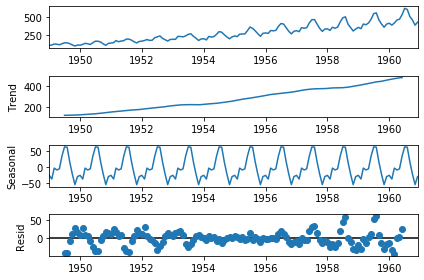

In [20]:
decomposition.plot()

In [38]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [40]:
df['Tick'] = range(0, len(df))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,1
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,2
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,3
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,4


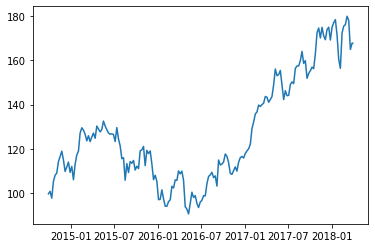

In [42]:
plt.plot(df['Date'], df['Close'], label="Original")

In [43]:
df1 = df.sample(frac=0.5)
df1 = df1.sort_values(by="Tick")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,1
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,2
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,3
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,4


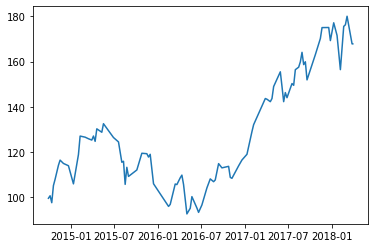

In [44]:
plt.plot(df1['Date'], df1['Close'], label="Sampled")

In [45]:
smooth = df

In [46]:
smooth['RollingMean'] = smooth['Close'].rolling(window=10).mean()
smooth.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick,RollingMean
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0,NaN
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,1,NaN
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,2,NaN
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,3,NaN
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,4,NaN


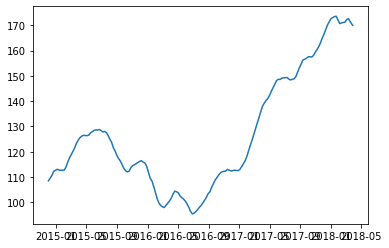

In [50]:
plt.plot(smooth['Date'], smooth['RollingMean'], label="Smooth")

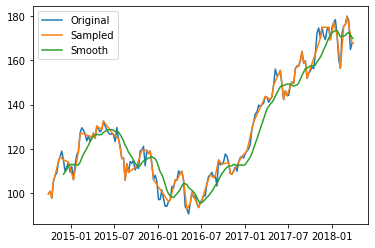

In [51]:
plt.plot(df['Date'], df['Close'], label="Original")
plt.plot(df1['Date'], df1['Close'], label="Sampled")
plt.plot(smooth['Date'], smooth['RollingMean'], label="Smooth")
plt.legend()
plt.show()